We want matplotlib to work inline in the notebook.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Basic plotting

plot() is the most basic command.  Here we also see that we can use LaTeX notation for the axes

Text(0, 0.5, '$\\cos(x)$')

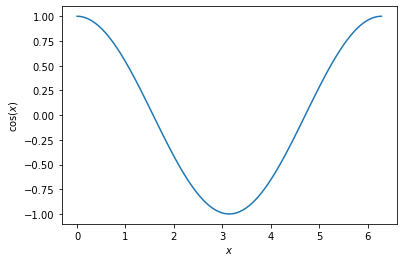

In [3]:
x = np.linspace(0, 2.0*np.pi, num=100)
y = np.cos(x)

plt.plot(x, y)
plt.xlabel(r"$x$")
plt.ylabel(r"$\cos(x)$")

We can plot multiple lines on a plot and set their colors or linestyle. The latter comes through the third argument. Here we also tighten up the x range of the plot.

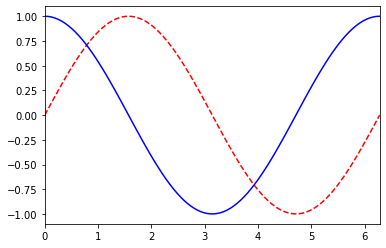

In [4]:
plt.clf()
plt.plot(x, np.sin(x), "r--")
plt.plot(x, np.cos(x), "b-")
plt.xlim(0.0, 2.0*np.pi)
plt.show()

We can use symbols instead of lines pretty easily too and label them.

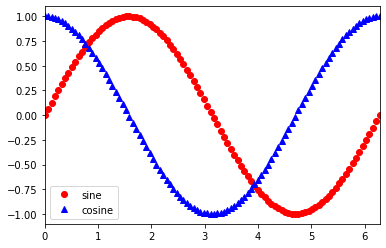

In [5]:
plt.plot(x, np.sin(x), "ro", label="sine")
plt.plot(x, np.cos(x), "b^", label="cosine")
plt.xlim(0.0, 2.0*np.pi)
plt.legend(frameon=True, loc="best")
plt.show()

Most functions take a number of optional named argumets too.

(0.0, 6.283185307179586)

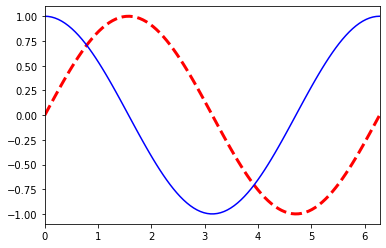

In [6]:
plt.plot(x, np.sin(x), "r--", linewidth=3.0)
plt.plot(x, np.cos(x), "b-")
plt.xlim(0.0, 2.0*np.pi)

There is a command setp(), which can also set the properties.  We can get the list of settable properties as follows:

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

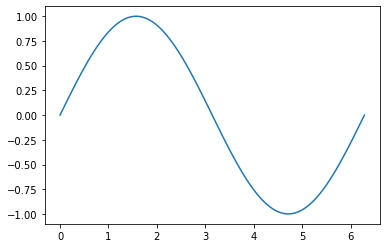

In [7]:
line = plt.plot(x, np.sin(x))
plt.setp(line)

# Multiple Axes

There are a wide range of methods for putting multiple axes on a grid.  We'll look at the simplest method.  All plotting commands apply to the current set of axes.

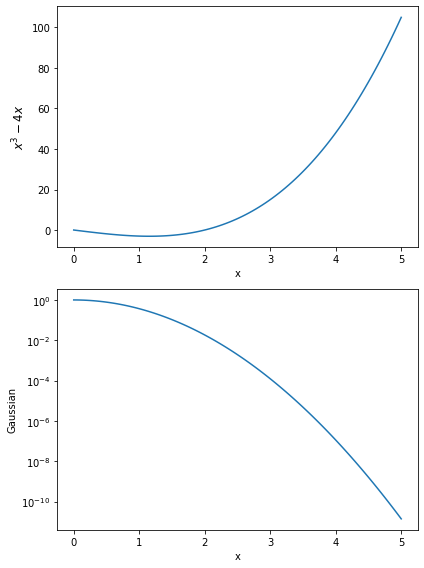

In [8]:
plt.subplot(211)

x = np.linspace(0,5,100)
plt.plot(x, x**3 - 4*x)
plt.xlabel("x")
plt.ylabel(r"$x^3 - 4x$", fontsize="large")

plt.subplot(212)

plt.plot(x, np.exp(-x**2))
plt.xlabel("x")
plt.ylabel("Gaussian")

# log scale
ax = plt.gca()
ax.set_yscale("log")

# get the figure and set its size
f = plt.gcf()
f.set_size_inches(6,8)

# tight_layout() makes sure things don't overlap
plt.tight_layout()
plt.savefig("test.png")

# Visualizing 2-d Array Data

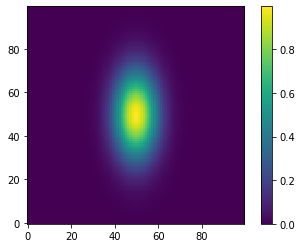

In [9]:
def g(x, y):
    return np.exp(-((x-0.5)**2)/0.1**2 - ((y-0.5)**2)/0.2**2)

N = 100

x = np.linspace(0.0,1.0,N)
y = x.copy()

xv, yv = np.meshgrid(x, y)

plt.imshow(g(xv,yv), origin="lower")
plt.colorbar()


(0.0, 99.0, 0.0, 99.0)

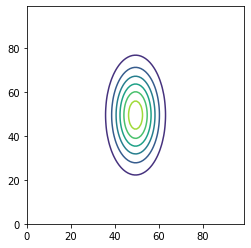

In [10]:
plt.contour(g(xv,yv))
plt.axis("scaled")   # this adjusts the size of image to make x and y lengths equal

# Error Bars

<ErrorbarContainer object of 3 artists>

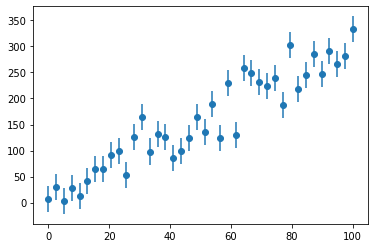

In [11]:
def y_experiment(a1, a2, sigma, x):
    """ return the experimental data in a linear + random fashion a1
        is the intercept, a2 is the slope, and sigma is the error """

    N = len(x)

    # randn gives samples from the "standard normal" distribution
    r = np.random.randn(N)
    y = a1 + a2*x + sigma*r
    return y

N = 40
x = np.linspace(0.0, 100.0, N)
sigma = 25.0*np.ones(N)
y = y_experiment(10.0, 3.0, sigma, x)
plt.scatter(x,y)
plt.errorbar(x, y, yerr=sigma, fmt="none")



# Annotations

Adding text and annotations is easy.

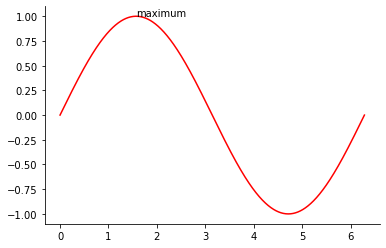

In [12]:
xx = np.linspace(0, 2.0*np.pi, 1000)
plt.plot(xx, np.sin(xx), color="r")
plt.text(np.pi/2, np.sin(np.pi/2), r"maximum")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')                                           
ax.yaxis.set_ticks_position('left') 

Text(0.05, 0.05, 'a polar annotation')

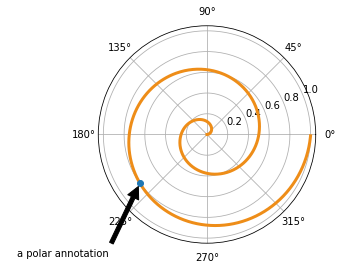

In [13]:
#example from http://matplotlib.org/examples/pylab_examples/annotation_demo.html
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
r = np.arange(0, 1, 0.001)
theta = 2*2*np.pi*r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)

ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # theta, radius
            xytext=(0.05, .05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='left',
            verticalalignment='bottom',
            )


# Surface Plots

Matplotlib can not deal with true 3-d data (i.e., x,y,z + a value), but it can plot 2-d surfaces and lines in 3-d.

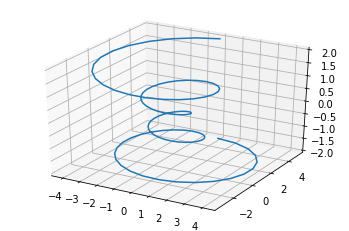

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")

# parametric curves
N = 100
theta = np.linspace(-4*np.pi, 4*np.pi, N)
z = np.linspace(-2, 2, N)
r = z**2 + 1

x = r*np.sin(theta)
y = r*np.cos(theta)

ax.plot(x,y,z)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa or antialiaseds: bool or sequence of bools
  array: ndarray
  capstyle: {'butt', 'round', 'projecting'}
  clim: a length 2 sequence of floats; may be overridden in methods that have ``vmin`` and ``vmax`` kwargs.
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  cmap: colormap or registered colormap name
  color: color or sequence of rgba tuples
  contains: callable
  edgecolor or ec or edgecolors: unknown
  facecolor or facecolors or fc: unknown
  figure: `.Figure`
  gid: str
  hatch: {'/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
  in_layout: bool
  joinstyle: {'miter', 'round', 'bevel'}
  label: object
  linestyle or dashes or linestyles or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or linewidths or lw: float or sequenc

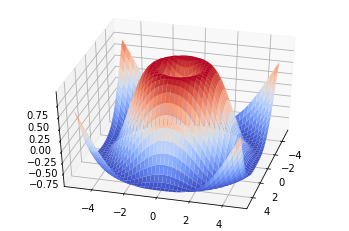

In [15]:
fig = plt.figure()
ax = fig.gca(projection="3d")
X = np.arange(-5,5, 0.25)
Y = np.arange(-5,5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="coolwarm")

# we can use setp to investigate and set options here too
plt.setp(surf)
plt.setp(surf,lw=0)
plt.setp(surf, facecolor="red")


# and the view (note: most interactive backends will allow you to rotate this freely)
ax = plt.gca()
ax.azim = 15
ax.elev = 40

# Histograms

here we generate a bunch of gaussian-normalized random numbers and make a histogram.  The probability distribution should match
$$y(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-x^2/(2\sigma^2)}$$

Text(0.5, 0, 'x')

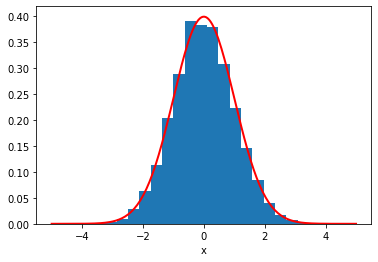

In [16]:
N = 10000
r = np.random.randn(N)
plt.hist(r, density=True, bins=20)

x = np.linspace(-5,5,200)
sigma = 1.0
plt.plot(x, np.exp(-x**2/(2*sigma**2))/(sigma*np.sqrt(2.0*np.pi)),
         c="r", lw=2)
plt.xlabel("x")


# Plotting Data from a File

numpy.loadtxt() provides an easy way to read columns of data from an ASCII file.

In [18]:
data = np.loadtxt("test1.exact.128.out")
print(data.shape)

OSError: test1.exact.128.out not found.

In [ ]:
plt.plot(data[:,1], data[:,2]/np.max(data[:,2]), label=r"$\rho$")
plt.plot(data[:,1], data[:,3]/np.max(data[:,3]), label=r"$u$")
plt.plot(data[:,1], data[:,4]/np.max(data[:,4]), label=r"$p$")
plt.plot(data[:,1], data[:,5]/np.max(data[:,5]), label=r"$T$")
plt.ylim(0,1.1)
plt.legend(frameon=False, loc="best", fontsize=12)